<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import export_graphviz,plot_tree
from six import StringIO  
from IPython.display import Image  
import pydotplus
import collections

### Reading the dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/MiitaliGupta/MachineLearning/main/Datasets/NASA_OrbitingBodies.csv')

x = dataset.iloc[:, [3, 5]].values
y = dataset.iloc[:, 6].values

dataset.head(10)

,Id,Name,Estimated Diameter,Diameter Category,Relative Velocity,Velocity Cayegory,Hazardous
0,2162635,162635 (2000 SS164),2.679415,Too High,13569.24922,Too Low,False
1,2277475,277475 (2005 WK4),0.594347,Too High,73588.72666,Too High,True
2,2512244,512244 (2015 YE18),1.614507,Too High,114258.69210,Too High,False
3,3596030,(2012 BV13),0.215794,High,24764.30314,Too Low,False
4,3667127,(2014 GE35),0.570217,Too High,42737.73376,Low,True
5,54138696,(2021 GY23),0.081291,Low,34297.58778,Low,False
6,54189957,(2021 PY40),0.383743,High,27529.47231,Too Low,False
7,54230078,(2021 XD6),0.011914,Too Low,57544.47008,High,False
8,2088213,88213 (2001 AF2),0.783502,Too High,56625.21012,High,False
9,3766065,(2016 YM),0.236614,High,48425.84033,High,False


Here we can see that column 2 to  5 are independent columns and column 6 i.e. 'Hazardous' is the dependent column which is based on the previous columns(0 to 5).

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1500 non-null   int64  
 1   Name                1500 non-null   object 
 2   Estimated Diameter  1500 non-null   float64
 3   Diameter Category   1500 non-null   object 
 4   Relative Velocity   1500 non-null   float64
 5   Velocity Cayegory   1500 non-null   object 
 6   Hazardous           1500 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 71.9+ KB


###Preprocessing

**Encoding character values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
y= le.fit_transform(y)

In [ ]:
print(x)

[[2 3]
 [2 2]
 [2 2]
 ...
 [3 0]
 [1 3]
 [2 1]]


In [ ]:
print(y)

[0 1 0 ... 0 0 0]


###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler() 
# x= x.reshape(-1,1) 
x = sc.fit_transform(x)  
# x_test = sc.transform(x_test)  

In [ ]:
# print(x)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# print(x_train)

In [ ]:
# print(y_train)

In [ ]:
# print(x_test)

In [ ]:
# print(y_test)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(X_train,y_train)
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8777777777777778


[Text(0.6, 0.9166666666666666, 'X[0] <= 0.874\ngini = 0.23\nsamples = 1050\nvalue = [911, 139]'), Text(0.5333333333333333, 0.75, 'X[0] <= -0.029\ngini = 0.291\nsamples = 786\nvalue = [647, 139]'), Text(0.3333333333333333, 0.5833333333333334, 'X[0] <= -0.932\ngini = 0.195\nsamples = 512\nvalue = [456, 56]'), Text(0.26666666666666666, 0.4166666666666667, 'X[1] <= 0.001\ngini = 0.355\nsamples = 243\nvalue = [187, 56]'), Text(0.13333333333333333, 0.25, 'X[1] <= -0.901\ngini = 0.336\nsamples = 136\nvalue = [107, 29]'), Text(0.06666666666666667, 0.08333333333333333, 'gini = 0.356\nsamples = 69\nvalue = [53, 16]'), Text(0.2, 0.08333333333333333, 'gini = 0.313\nsamples = 67\nvalue = [54, 13]'), Text(0.4, 0.25, 'X[1] <= 0.902\ngini = 0.377\nsamples = 107\nvalue = [80, 27]'), Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.399\nsamples = 69\nvalue = [50, 19]'), Text(0.4666666666666667, 0.08333333333333333, 'gini = 0.332\nsamples = 38\nvalue = [30, 8]'), Text(0.4, 0.4166666666666667, 'gin

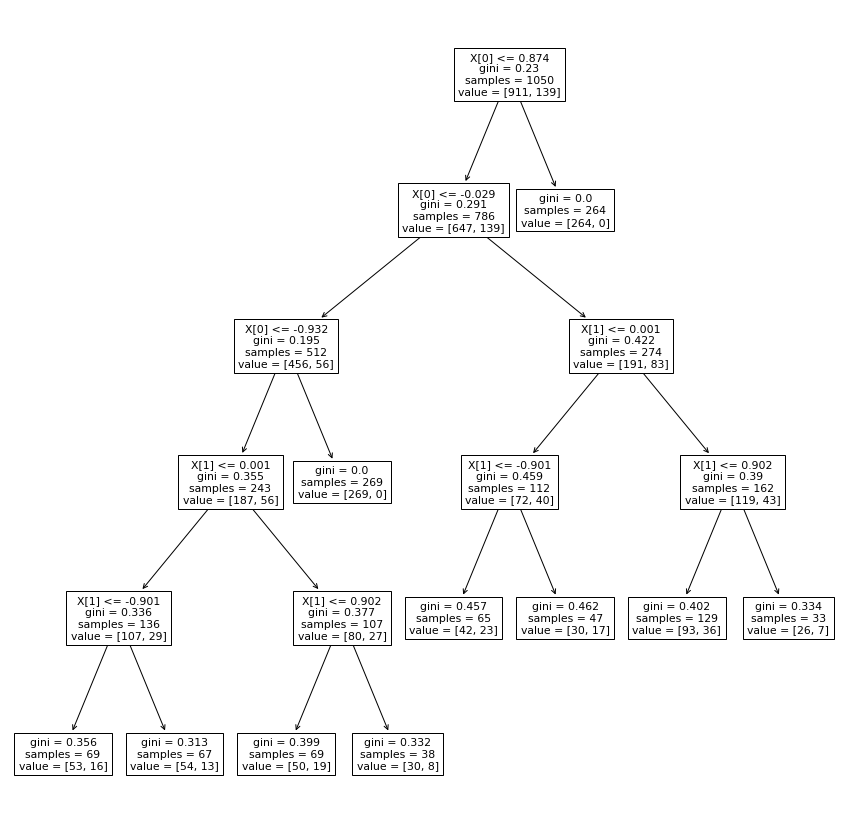

In [ ]:
plt.figure(figsize=(15,15))
print(plot_tree(clf))

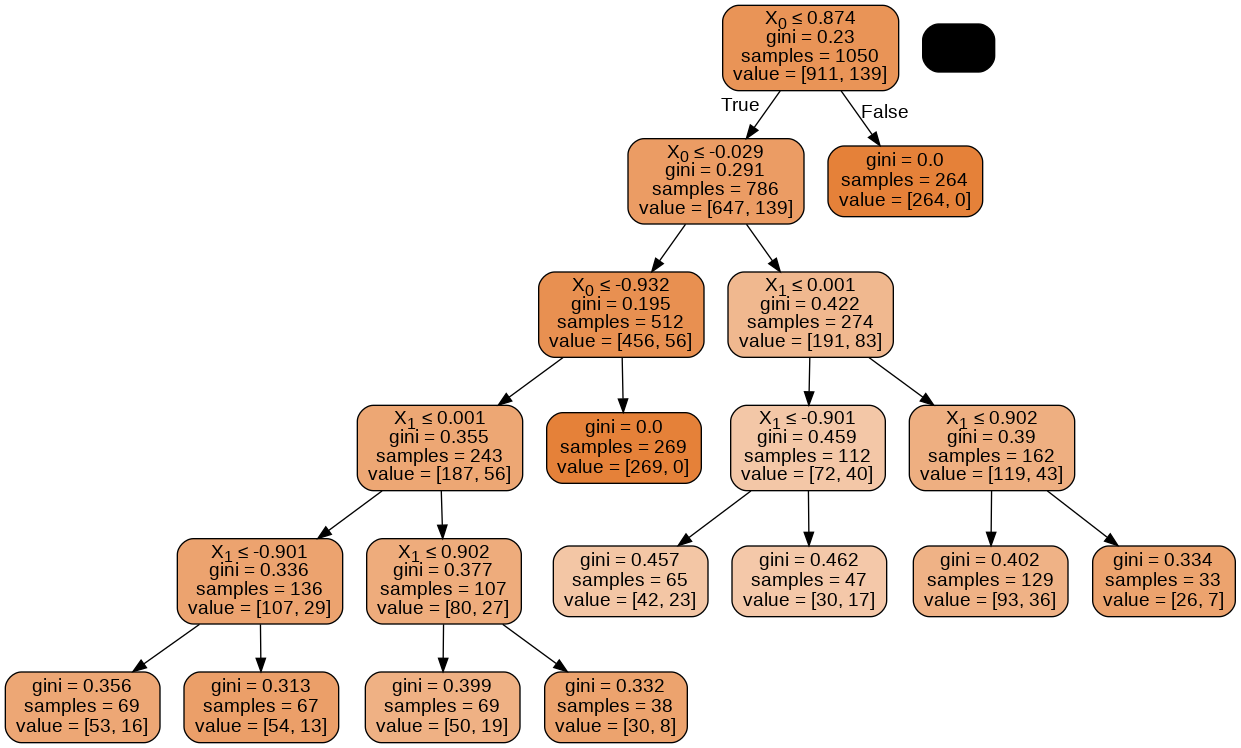

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('redblue.png')
Image(graph.create_png())

## <b>Interpretation</b>:

With the given data, we have produced a <b>Decision Tree</b>.<br>
The purpose of the decision tree is to form a flow-chart like structure where with each internal node we can represent a test whose possible outcomes are portrayed in different branches. This enables us to formulate a decision for the data provided.<br>
<br>
Here, we have used the variable X<sub>0</sub> to decide the flow of the decision to be made.<br>
For instance, in the first step, we are checking if the value of X<sub>0</sub> is lesser than 0.874 or not. And depending upon the value of this test (true or false), we go ahead in the tree.<br>
And in further tests, we again check the value of X<sub>0</sub>, comparing it with other values, or of X<sub>1</sub>, comparing it with other values, and depending upon the boolean solution to the queries at each step, we will choose which branch to move further down on the tree, until we reach one final leaf, which does not contain any further branches.<br>
Whatever that leaf will ential, will be the final decision of the tree.